In [13]:
# [Step 1] Set up the environment
import refinitiv.dataplatform as rdp
import datetime
import pandas as pd
rdp.open_desktop_session('DEFAULT_CODE_BOOK_APP_KEY')

In [19]:
# [Step 2] Using RDP Search API to retrieve the data
df = rdp.search(
    view = rdp.SearchViews.GovCorpInstruments,
    top = 10000,
    filter = "((DbType eq 'GOVT' or DbType eq 'CORP' or DbType eq 'AGNC' or DbType eq 'OMUN' or DbType eq 'OTHR') and IsActive eq true and (RCSParentDomicileGenealogy in ('G:53' 'G:3H') and RCSCurrencyLeaf eq 'US Dollar' and RCSCountryGenealogy ne 'M:DQ\G:B6'))",
    select = "RIC,RCSTRBC2012Leaf,IssueDate,EOMAmountOutstanding,PricingRedemDate,IssuerLegalName,PricingClosingYield, CurrentYield, FaceIssuedTotal,EOMPriceChange,RCSBondGradeLeaf,EOMPriceReturn"
)
display(df)

EOMAmountOutstanding                                    RCSTRBC2012Leaf  \
0              300000000.0  Real Estate Rental, Development & Operations (...   
1              500000000.0                 Corporate Financial Services (NEC)   
2              300000000.0  Real Estate Rental, Development & Operations (...   
3              775000000.0                 Corporate Financial Services (NEC)   
4              600000000.0                               Commercial Buildings   
...                    ...                                                ...   
5597                  <NA>                 Corporate Financial Services (NEC)   
5598                  <NA>      Investment Banking & Brokerage Services (NEC)   
5599           500000000.0                     Fossil Fuel Electric Utilities   
5600          2247453000.0  Real Estate Rental, Development & Operations (...   
5601          1147000000.0  Real Estate Rental, Development & Operations (...   

              PricingRedemDate  EOMPriceChange  RCSBondGradeLeaf  \
0                         <NA>           0.125        High Yield   
1     2023-01-03T00:00:00.000Z            0.25  Investment Grade   
2                         <NA>           -0.75        High Yield   
3     2022-09-14T00:00:00.000Z          -0.375  Investment Grade   
4     2022-09-21T00:00:00.000Z          -1.875        High Yield   
...                        ...             ...               ...   
5597                      <NA>            <NA>              <NA>   
5598                      <NA>            <NA>              <NA>   
5599                      <NA>             0.0              <NA>   
5600  2024-07-01T00:00:00.000Z            -3.0        High Yield   
5601  2022-06-30T00:00:00.000Z           -2.75        High Yield   

                                        IssuerLegalName  EOMPriceReturn  \
0                 RKI Overseas Finance 2017 (A) Limited        0.158713   
1                           Franshion Brilliant Limited        0.253943   
2                        CIFI HOLDINGS (GROUP) CO. LTD.             0.0   
3     Wei Chai Guo Ji (Xiang Gang) Neng Yuan Ji Tuan...       -0.365631   
4                  Sino-Ocean Land Treasure III Limited       -2.350123   
...                                                 ...             ...   
5597                   TEWOO GROUP FINANCE NO 3 LIMITED            <NA>   
5598                              Nuoxi Capital Limited            <NA>   
5599                    Hua Chen Dian Li Gu Fen Gong Si            <NA>   
5600                          KAISA GROUP HOLDINGS LTD.      -11.320755   
5601                          KAISA GROUP HOLDINGS LTD.      -10.185185   

      CurrentYield  PricingClosingYield  FaceIssuedTotal  \
0             8.96             8.958019      300000000.0   
1         4.066074             5.969128      500000000.0   
2         5.764075            10.897199      300000000.0   
3         3.722084             2.374339      775000000.0   
4         6.436782             60.04407      600000000.0   
...            ...                  ...              ...   
5597          <NA>                 <NA>      300000000.0   
5598          <NA>                 <NA>      300000000.0   
5599          <NA>                 <NA>      500000000.0   
5600     39.893617            72.272454     3119000000.0   
5601     35.051546           899.628866     1255000000.0   

                     IssueDate           RIC  
0     2017-06-23T00:00:00.000Z  BM163599660=  
1     2017-07-03T00:00:00.000Z  HK163733218=  
2     2017-08-24T00:00:00.000Z  KY165347072=  
3     2017-09-14T00:00:00.000Z  CN167935001=  
4     2017-09-21T00:00:00.000Z  HK167702457=  
...                        ...           ...  
5597  2017-04-06T00:00:00.000Z  CN158789434=  
5598  2017-04-20T00:00:00.000Z  CN159913279=  
5599  2017-05-18T00:00:00.000Z  CN159317196=  
5600  2017-06-30T00:00:00.000Z  KY162759809=  
5601  2017-06-30T00:00:00.000Z  KY162759795=  

[5602 rows x 12 columns]

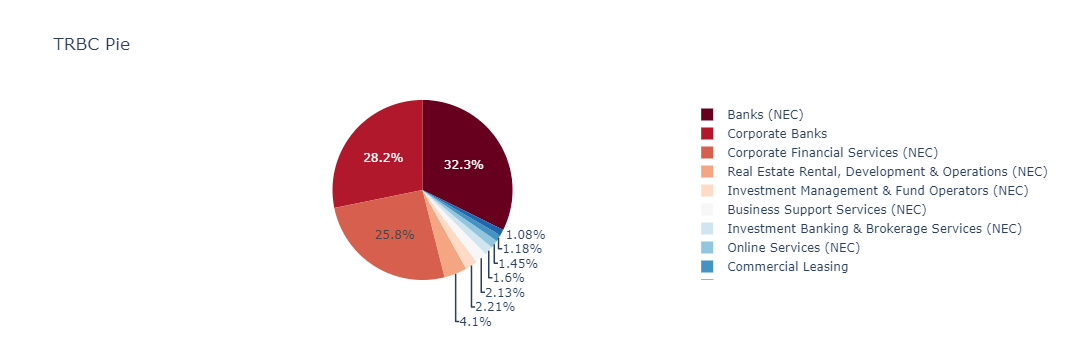

In [20]:
# [Step 3] Visualize the Kungfu bonds
# 3.1 ) TRBC Pie
import plotly.express as px
rt = df.groupby("RCSTRBC2012Leaf",as_index=False).agg('count')
rt = rt.sort_values('RIC', ascending = False).head(10)
fig = px.pie(rt, values='RIC', names='RCSTRBC2012Leaf', title='TRBC Pie',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

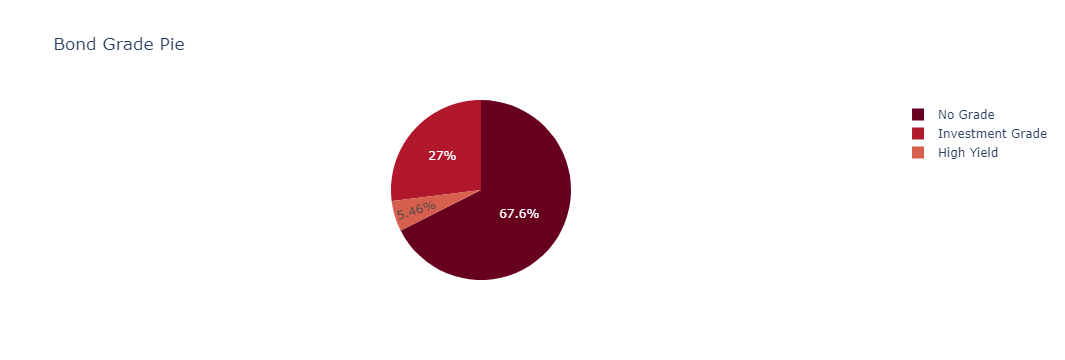

In [21]:
# 3.2 ) Bond Grade Pie 
df['RCSBondGradeLeaf'].fillna("No Grade", inplace=True)
grad = df.groupby("RCSBondGradeLeaf",as_index=False).agg('count')
fig = px.pie(grad, values='RIC', names='RCSBondGradeLeaf', title='Bond Grade Pie',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

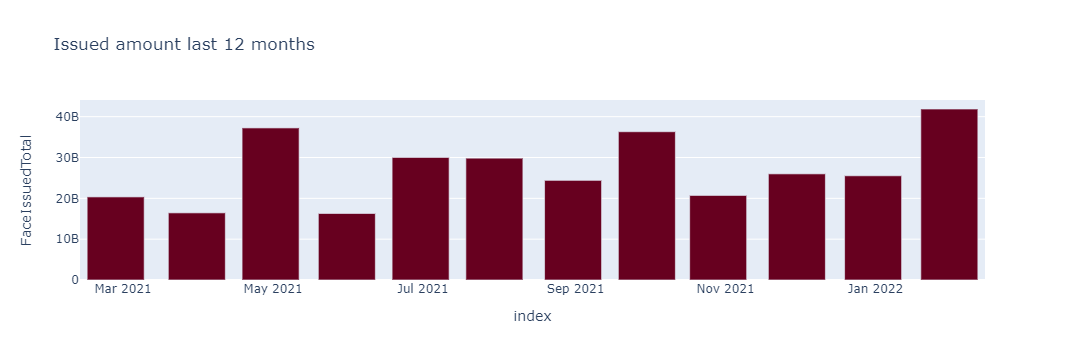

In [22]:
# 3.3 ) Issued amount last 12 months 
from datetime import date
from dateutil.relativedelta import relativedelta
decb = date.today() + relativedelta(months=-12)
start = datetime.datetime(decb.year, decb.month, 1).strftime("%Y-%m-%d %H:%M:%S")[0:10]
end = date.today().strftime("%Y-%m-%d %H:%M:%S")[0:10]

cols = ['RIC','IssueDate','FaceIssuedTotal']
c = df[cols].copy()
c.loc[:,"IssueDate"] = pd.to_datetime(c["IssueDate"])
c = c.set_index("IssueDate").sort_index(ascending=False)
c_month = c.resample('BM').sum()
c_monthb = c_month[start:end]
c_monthb.index.name = None

import plotly.express as px
fig = px.bar(c_monthb, y='FaceIssuedTotal', title = 'Issued amount last 12 months', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

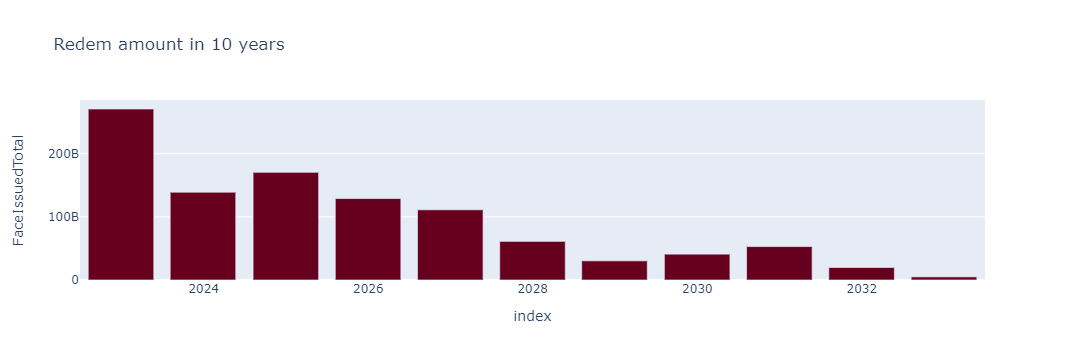

In [23]:
# 3.4 ) Redem amount in 10 years
yearsf = date.today() + relativedelta(years=+10)
end = datetime.datetime(yearsf.year, yearsf.month, 1).strftime("%Y-%m-%d %H:%M:%S")[0:4]
start = date.today().strftime("%Y-%m-%d %H:%M:%S")[0:4]
cols = ['RIC','PricingRedemDate','FaceIssuedTotal']
d = df[cols].copy()
d.loc[:,"PricingRedemDate"] = pd.to_datetime(d["PricingRedemDate"], errors = 'coerce')
d = d.set_index("PricingRedemDate").sort_index(ascending=True)
d_month = d.resample('BY').sum()
d_monthf = d_month[start:end]
d_monthf.index.name = None

import plotly.express as px
fig = px.bar(d_monthf, y='FaceIssuedTotal',title = 'Redem amount in 10 years', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

2021-11-01 2022-02-24


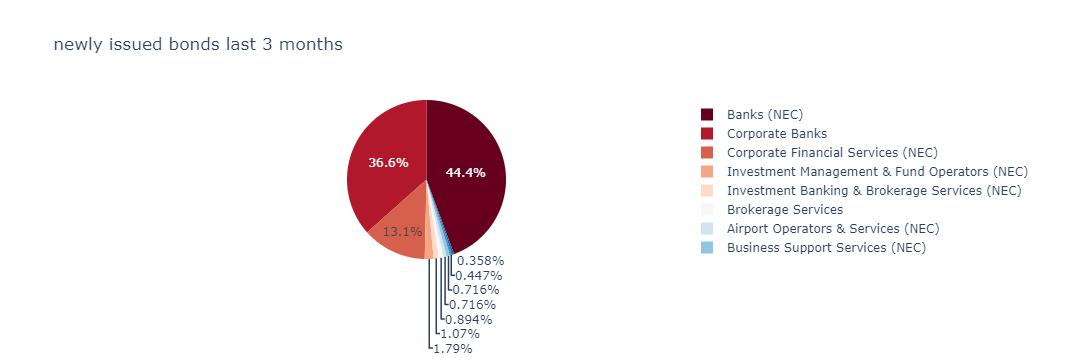

In [24]:
# 3.5 ) Newly issued bonds last 3 months
monb3 = date.today() + relativedelta(months=-3)
start = datetime.datetime(monb3.year, monb3.month, 1).strftime("%Y-%m-%d %H:%M:%S")[0:10]
end = date.today().strftime("%Y-%m-%d %H:%M:%S")[0:10]
print(start, end)
cols = ['RIC','IssueDate','FaceIssuedTotal','RCSTRBC2012Leaf']
f = df[cols].copy()
f.loc[:,"IssueDate"] = pd.to_datetime(f["IssueDate"])
f = f.set_index("IssueDate").sort_index(ascending=True)
f_3m = f[start:end]
rt = f_3m.groupby("RCSTRBC2012Leaf",as_index=False).agg('count')
rt = rt.sort_values('RIC', ascending = False).head(10)
fig = px.pie(rt, values='RIC', names='RCSTRBC2012Leaf', title='newly issued bonds last 3 months',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [25]:
# 3.6 ) Price top 10
cols = ['RIC','IssuerLegalName','EOMPriceReturn','EOMPriceChange']
price = df[cols].copy()

price_top10 = price.sort_values('EOMPriceReturn', ascending = False).head(10)
price_top10

RIC                                    IssuerLegalName  \
3571  BM206552239=                           PB Issuer (No.5) Limited   
273   VG195949778=                       AGILE GROUP HOLDINGS LIMITED   
1991  VG238227437=                       AGILE GROUP HOLDINGS LIMITED   
1890  VG165911962=                       AGILE GROUP HOLDINGS LIMITED   
2836  HK228043567=  Guang Zhou Shi Fang Yuan Fang Di Chan Fa Zhan ...   
3988  HK209803445=                Sino-Ocean Land Treasure Iv Limited   
1586  KY143232042=  SEMICONDUCTOR MANUFACTURING INTERNATIONAL CORP...   
64    VG208152467=                       AGILE GROUP HOLDINGS LIMITED   
3352  KY209096277=            BOSIDENG INTERNATIONAL HOLDINGS LIMITED   
59    VG207141348=                       AGILE GROUP HOLDINGS LIMITED   

      EOMPriceReturn  EOMPriceChange  
3571       13.813694          22.895  
273        13.704911          11.625  
1991       11.636544           6.375  
1890       10.441351           5.875  
2836        8.870272             8.0  
3988        8.719439           6.375  
1586        8.389535           16.98  
64          7.778936           2.125  
3352         7.48555           7.887  
59          7.269203           1.875

In [26]:
# 3.7 ) Yield
cols = ['RIC','IssuerLegalName','CurrentYield','PricingClosingYield']
y = df[cols]
y = y[y['CurrentYield']>0]

In [27]:
# 3.7.1 ) Yield top 10
yield_top10 = y.sort_values('CurrentYield', ascending = False).head(10)
yield_top10

RIC                    IssuerLegalName  CurrentYield  \
3573  BM191261364=      Noble Trading Hold Co Limited        243.75   
3055  CN232077654=  YANGO (CAYMAN) INVESTMENT LIMITED    188.235294   
5575  CN225310785=  YANGO (CAYMAN) INVESTMENT LIMITED      148.4375   
2020  CN222357438=  YANGO (CAYMAN) INVESTMENT LIMITED    140.298507   
2976  CN236982947=  YANGO (CAYMAN) INVESTMENT LIMITED    109.170306   
5556  HK196021825=           MIE HOLDINGS CORPORATION     91.666667   
2747  VG207602698=    ZHENRO PROPERTIES GROUP LIMITED     83.181818   
3040  VG215221997=    ZHENRO PROPERTIES GROUP LIMITED     75.909091   
2878  VG218584292=    ZHENRO PROPERTIES GROUP LIMITED     75.454545   
3079  VG209941309=    ZHENRO PROPERTIES GROUP LIMITED     71.590909   

      PricingClosingYield  
3573           234.390766  
3055           609.791551  
5575           368.753123  
2020          1823.266577  
2976           217.166895  
5556          4340.425532  
2747           343.392167  
3040           184.831921  
2878           248.411497  
3079           172.583237

In [28]:
# 3.7.1 ) Yield last 10
yield_last10 = y.sort_values('CurrentYield', ascending = True).head(10)
yield_last10

RIC                                    IssuerLegalName  \
170   06428FTS6=            Bank of China Limited (New York Branch)   
512   06428FTY3=            Bank of China Limited (New York Branch)   
585   06428FUE5=            Bank of China Limited (New York Branch)   
907   06428FUL9=            Bank of China Limited (New York Branch)   
1132  06428FUP0=            Bank of China Limited (New York Branch)   
1264  45581ECB5=  INDUSTRIAL AND COMMERCIAL BANK OF CHINA (USA),...   
1299  06428FTM9=            Bank of China Limited (New York Branch)   
1491  06428FTZ0=            Bank of China Limited (New York Branch)   
1546  06428FTC1=            Bank of China Limited (New York Branch)   
1550  06428FUF2=            Bank of China Limited (New York Branch)   

      CurrentYield  PricingClosingYield  
170           0.05             0.101076  
512       0.050003             0.118925  
585       0.050003             0.122984  
907       0.050008             0.136903  
1132      0.050011               0.1472  
1264      0.050014              0.15682  
1299      0.050015             0.162896  
1491      0.050024             0.199122  
1546      0.050028             0.209952  
1550      0.050028             0.209978

In [18]:
rdp.close_session()